# Presentation
For the class. Presented March 15, 2016 at 9 am.

## Abstract
See where a Republican candidate's constiuents and supporters go after they drop out of the race for presidential nomination. Do one candidate's support go mostly to another candidate? Do they go to a couple? Do they mostly go undecided directly after their top choice suspends their campaign?

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import numpy as np
import pandas as pd
import os
import math
from IPython.display import display, HTML

import stats

## Original Polling Data
http://elections.huffingtonpost.com/pollster/2016-national-gop-primary

Downloaded as a CSV from Huffington Post's Pollster.

In [2]:
polls = pd.read_csv('/data/dorfman/2016-national-gop-primary.csv')
polls.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Cruz,Kasich,...,Perry,Rand Paul,Rubio,Santorum,Walker,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Ipsos/Reuters,2016-03-19,2016-03-23,2016-03-24 17:37:44 UTC,523,Registered Voters - Republican,Internet,45,28,20,...,NaN,NaN,NaN,NaN,NaN,7,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/2016Reute...,Nonpartisan,None
1,FOX,2016-03-20,2016-03-22,2016-03-23 22:19:32 UTC,388,Likely Voters - Republican,Live Phone,41,38,17,...,NaN,NaN,NaN,NaN,NaN,1,http://elections.huffingtonpost.com/pollster/p...,http://www.foxnews.com/politics/interactive/20...,Nonpartisan,None
2,Bloomberg/Selzer,2016-03-19,2016-03-22,2016-03-23 21:46:55 UTC,366,Likely Voters - Republican,Live Phone,40,31,25,...,NaN,NaN,NaN,NaN,NaN,5,http://elections.huffingtonpost.com/pollster/p...,http://assets.bwbx.io/documents/users/iqjWHBFd...,Nonpartisan,None
3,Morning Consult,2016-03-18,2016-03-21,2016-03-21 19:05:11 UTC,754,Registered Voters - Republican,Internet,45,26,13,...,NaN,NaN,NaN,NaN,NaN,10,http://elections.huffingtonpost.com/pollster/p...,https://morningconsult.com/2016/03/paul-ryan-g...,Nonpartisan,None
4,Quinnipiac,2016-03-16,2016-03-21,2016-03-23 11:19:56 UTC,652,Registered Voters - Republican,Live Phone,43,29,16,...,NaN,NaN,NaN,NaN,NaN,9,http://elections.huffingtonpost.com/pollster/p...,http://www.quinnipiac.edu/news-and-events/quin...,Nonpartisan,None


## Cleaned Polling Data
### Columns
Cleaning included removing columns that weren't candidate names (i.e 'Pollster', 'Population'). Got rid of the 'Start Date' and treated the 'End Date' as the only 'date'.

### Undecided
If 'Undecided' has 'NaN', it was replaced with a 0. If the summation of polling was less than 100, the remainder was added to 'Undecided'. If the summation of polling was greater than 100, the surplus was subtracted from 'Undecided'. If a candidate had polling data after they suspended their campaign, that number would be added to 'Undecided'.

### Data only from 2016
All polls conducted before January 1, 2016 were removed, as were all candidates that suspended their campaigns before January 1, 2016. If multiple polls were coducted on the same day, the polls would be grouped and averaged.

In [3]:
polls = pd.read_csv('polls.csv')
polls.date = pd.Series(pd.DatetimeIndex(polls.date))
polls.index = polls.date
del polls['date']
polls.head()

,Trump,Cruz,Kasich,Bush,Carson,Christie,Fiorina,Gilmore,Huckabee,Paul,Rubio,Santorum,Undecided
date,,,,,,,,,,,,,
2016-01-03,35.00,18.00,2.0,6,9.0,4.00,3.0,0,2.0,2.00,13.00,1.00,5.0
2016-01-06,38.50,17.00,2.5,6,8.5,3.50,2.0,0,2.0,4.00,10.50,1.00,4.5
2016-01-07,35.00,20.00,2.0,4,10.0,2.00,3.0,0,1.0,2.00,13.00,0.00,8.0
2016-01-08,34.00,18.00,2.0,4,8.0,4.00,2.0,NaN,1.0,3.00,9.00,NaN,15.0
2016-01-10,39.25,17.25,2.5,5,8.0,3.25,2.5,0,2.5,2.25,10.75,0.25,6.5


## Dropout Data
https://en.wikipedia.org/wiki/United_States_presidential_election,_2016#Withdrawn_candidates_2

Manually made dictionary using data (from Wikipedia) on when candidates dropped out. 

In [4]:
candidates = pd.read_csv('candidates.csv', index_col='name')
candidates.date = pd.to_datetime(candidates.date)
candidates

,date,dropped
name,,
Trump,NaT,False
Cruz,NaT,False
Kasich,NaT,False
Bush,2016-02-16,True
Carson,2016-03-04,True
Christie,2016-02-10,True
Fiorina,2016-02-10,True
Gilmore,2016-02-12,True
Huckabee,2016-02-01,True


## Graphing the Data As It Is
Vertical lines represented the date a candidate dropped out.

In [5]:
def GraphAllPolls():
    """Graphs out all polling data"""
    plt.figure(figsize=(20,10))

    for p in polls:
        plt.plot(polls[p])

    plt.axvline(candidates['date']['Carson'], color='#c9c95b')
    plt.axvline(candidates['date']['Bush'], color='#72bcd4')

    # Christie and Fiorina dropped out on the same day. Offset Christie's line by several hours so both lines display
    plt.axvline(candidates['date']['Christie'] + datetime.timedelta(hours=8), color='b') 
    plt.axvline(candidates['date']['Fiorina'], color='#66b266')
    plt.axvline(candidates['date']['Gilmore'], color='#e54444')
    plt.axvline(candidates['date']['Huckabee'], color='purple')

    # Paul and Santorum dropped out on the same day. Offset Paul's line by several hours so both lines display
    plt.axvline(candidates['date']['Paul'] + datetime.timedelta(hours=8), color='#c9c95b')
    plt.axvline(candidates['date']['Santorum'], color='#72bcd4')

    plt.title("GOP Candidate Polling", size=18)
    plt.xlabel("Date of Poll", size=16)
    plt.ylabel("Polling Percentage", size=16)

    # x and y limits are a little greater than needed to display the legend without blocking out data
    plt.xlim('2016-01-03', '2016-03-22')
    plt.ylim(0, 60)
    plt.legend(fontsize=12)

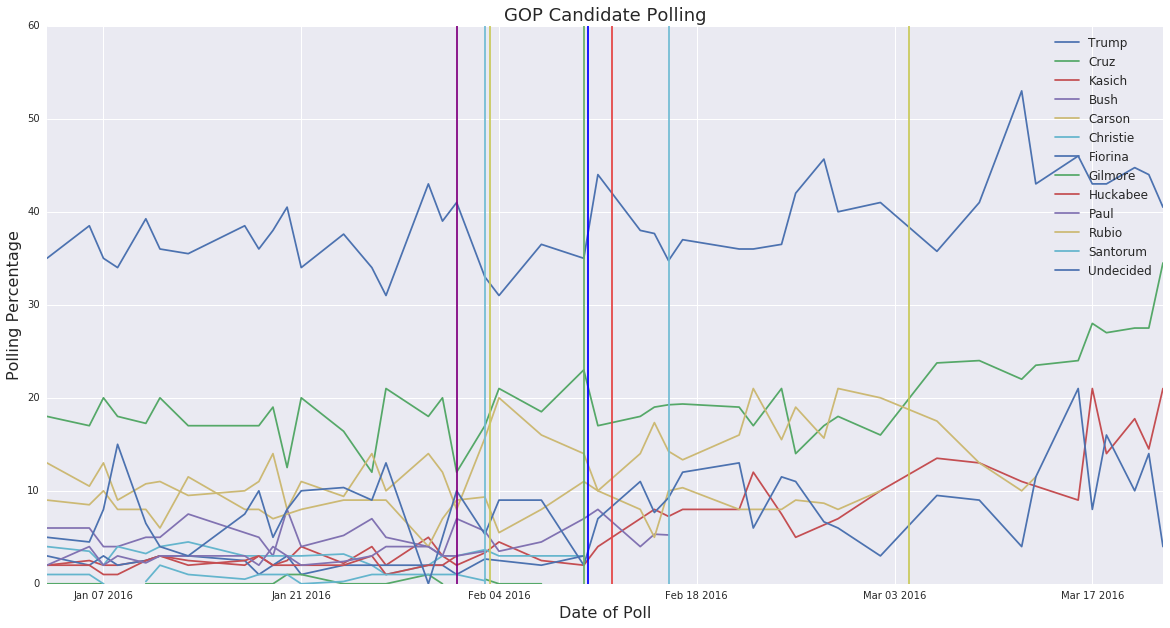

In [6]:
GraphAllPolls()

## Bootstrap Sampled Data
Bootstrapped the data with sampling from the existing data. Sampling data is averaged with the original data with sampling data being weighted at 1/3 of the average.

### Import Bootstrapped Data

In [7]:
polls = pd.read_csv('bootPolls.csv')
polls.date = pd.Series(pd.DatetimeIndex(polls.date))
polls.index = polls.date
del polls['date']
polls.head()

,Trump,Cruz,Kasich,Bush,Carson,Christie,Fiorina,Gilmore,Huckabee,Paul,Rubio,Santorum,Undecided
date,,,,,,,,,,,,,
2016-01-03,36.089000,18.524611,3.360222,5.091611,8.308333,3.239111,2.421111,0.031667,1.620000,1.809333,12.664056,0.785556,6.055389
2016-01-06,38.676778,18.191833,4.053833,4.960222,7.595000,2.825500,1.703333,0.023333,1.630000,3.103500,10.752389,0.784167,5.700111
2016-01-07,36.322111,20.089833,3.730611,3.691444,8.535556,1.822000,2.361667,0.035000,0.948333,1.762333,12.262333,0.100833,8.337944
2016-01-08,35.720444,18.764556,3.733389,3.707833,7.223333,3.200333,1.701667,0.028333,0.961667,2.394000,9.459833,0.122500,12.982111
2016-01-10,39.251389,17.832500,3.654722,4.526389,7.519444,2.640833,2.028333,0.055000,1.986667,1.962500,11.010000,0.299167,7.233056


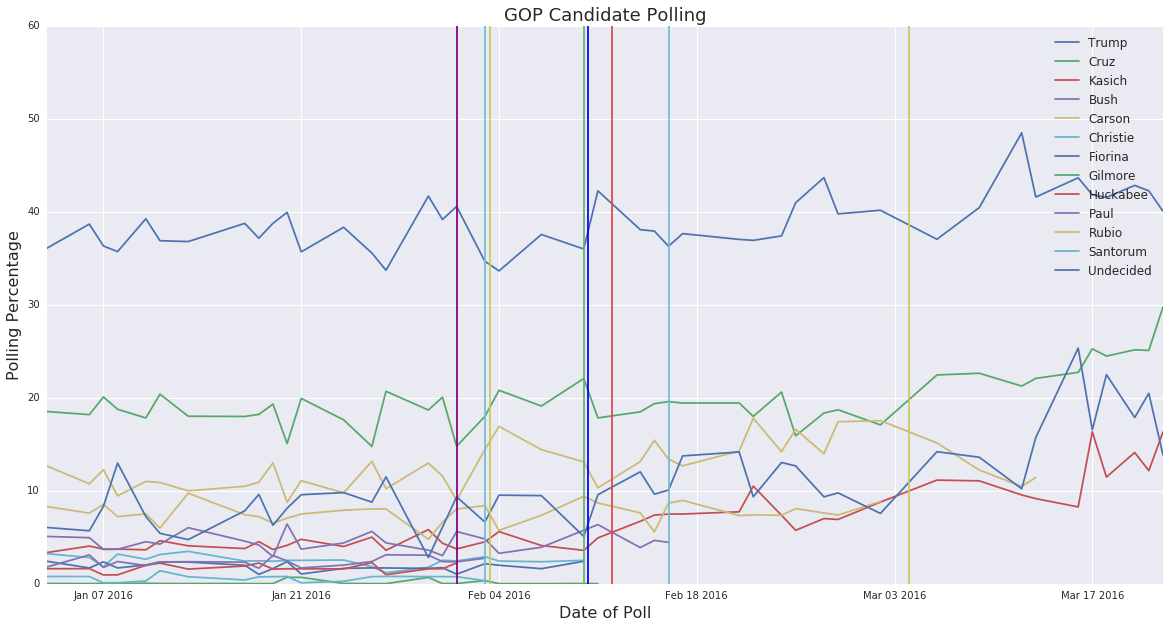

In [8]:
GraphAllPolls()

## Exploration
### Splicing the DataFrame
Create a new DataFrame for every candidate that suspended their campaign. The new DataFrame is just a snippet of the main polling from a week before the candidate dropped out to 9 days after they dropped out.
#### Example: Ben Carson

In [9]:
HuckabeePolls = polls[(polls.index > candidates['date']['Huckabee'] - datetime.timedelta(days=7)) \
     & (polls.index < candidates['date']['Huckabee'] + datetime.timedelta(days=9))]
BushPolls = polls[(polls.index > candidates['date']['Bush'] - datetime.timedelta(days=7)) \
     & (polls.index < candidates['date']['Bush'] + datetime.timedelta(days=9))]
CarsonPolls = polls[(polls.index > candidates['date']['Carson'] - datetime.timedelta(days=7)) \
     & (polls.index < candidates['date']['Carson'] + datetime.timedelta(days=9))]
CarsonPolls

,Trump,Cruz,Kasich,Bush,Carson,Christie,Fiorina,Gilmore,Huckabee,Paul,Rubio,Santorum,Undecided
date,,,,,,,,,,,,,
2016-02-27,43.673389,18.360222,7.014000,NaN,7.616667,NaN,NaN,NaN,NaN,NaN,13.988556,NaN,9.347167
2016-02-28,39.776000,18.709278,6.915889,NaN,7.396111,NaN,NaN,NaN,NaN,NaN,17.424278,NaN,9.778444
2016-03-02,40.166167,17.091333,8.787889,NaN,8.845000,NaN,NaN,NaN,NaN,NaN,17.543833,NaN,7.565778
2016-03-06,37.044889,22.453444,11.152000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.148167,NaN,14.201500
2016-03-09,40.452722,22.640333,11.066833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.231167,NaN,13.608944
2016-03-12,48.491444,21.259389,9.555111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.476333,NaN,10.217722


## Before/After Averaging
Create two DataFrames indexed by the candidates that dropped out of the race during the primaries. 

In [10]:
PollingBeforeDrop = pd.read_csv('PollingBeforeDrop.csv')
PollingAfterDrop = pd.read_csv('PollingAfterDrop.csv')

PollingBeforeDrop.index = PollingBeforeDrop['name']
PollingAfterDrop.index = PollingAfterDrop['name']

del PollingBeforeDrop['name']
del PollingAfterDrop['name']

### Polling Before Drop
Each column in PollingBeforeDrop holds other candidates' average polling numbers in the week prior to a candidate's campaign suspension. Each cell contains the polling for a candidate in the column the week before the candidate in the row dropped out.

In [11]:
PollingBeforeDrop = PollingBeforeDrop.fillna(0)
PollingBeforeDrop.head()

,Trump,Cruz,Kasich,Bush,Carson,Christie,Fiorina,Gilmore,Huckabee,Paul,Rubio,Santorum,Undecided
name,,,,,,,,,,,,,
Bush,38.112456,19.471322,6.027467,5.028578,7.996444,0.00000,0.000000,0.000000,0,0,13.080211,0,10.283522
Carson,41.205185,18.053611,7.572593,0.000000,7.952593,0.00000,0.000000,0.000000,0,0,16.318889,0,8.897130
Christie,35.735759,20.663870,4.440500,4.319574,7.502222,2.44763,2.014074,0.021111,0,0,14.819981,0,8.035278
Fiorina,35.735759,20.663870,4.440500,4.319574,7.502222,2.44763,2.014074,0.021111,0,0,14.819981,0,8.035278
Gilmore,38.605704,19.674944,4.215296,5.349278,8.485000,0.00000,0.000000,0.021111,0,0,12.615963,0,11.032704


### Polling After Drop
Each column in PollingAfterDrop holds other candidates' average polling numbers in the week after a candidate suspends their campaign. Each cell contains the polling for a candidate in the column the week after the candidate in the row dropped out. The average is weighted heavier towards days further away from the date of suspension.

In [12]:
PollingAfterDrop = PollingAfterDrop.fillna(0)
PollingAfterDrop.head()

,Trump,Cruz,Kasich,Bush,Carson,Christie,Fiorina,Gilmore,Huckabee,Paul,Rubio,Santorum,Undecided
name,,,,,,,,,,,,,
Bush,37.183442,19.478322,8.406619,0.000000,7.451806,0,0,0.000000,0,0,15.223864,0,12.255947
Carson,44.285663,21.878911,10.271937,0.000000,0.000000,0,0,0.000000,0,0,11.684189,0,11.879300
Christie,37.633174,19.227986,7.229041,4.503833,7.910580,0,0,0.016667,0,0,13.446138,0,10.032582
Fiorina,37.633174,19.227986,7.229041,4.503833,7.910580,0,0,0.016667,0,0,13.446138,0,10.032582
Gilmore,37.385325,19.330885,7.365175,4.404654,7.967341,0,0,0.000000,0,0,13.544377,0,10.002243


## Calculate Differences
Create a DataFrame subtracting PollingBeforeDrop from PollingAfterDrop.

In [13]:
PollingDiff = PollingAfterDrop - PollingBeforeDrop
PollingDiff.head()

,Trump,Cruz,Kasich,Bush,Carson,Christie,Fiorina,Gilmore,Huckabee,Paul,Rubio,Santorum,Undecided
name,,,,,,,,,,,,,
Bush,-0.929014,0.007000,2.379153,-5.028578,-0.544639,0.00000,0.000000,0.000000,0,0,2.143653,0,1.972425
Carson,3.080478,3.825300,2.699344,0.000000,-7.952593,0.00000,0.000000,0.000000,0,0,-4.634700,0,2.982170
Christie,1.897415,-1.435885,2.788541,0.184259,0.408357,-2.44763,-2.014074,-0.004444,0,0,-1.373844,0,1.997304
Fiorina,1.897415,-1.435885,2.788541,0.184259,0.408357,-2.44763,-2.014074,-0.004444,0,0,-1.373844,0,1.997304
Gilmore,-1.220378,-0.344060,3.149878,-0.944623,-0.517659,0.00000,0.000000,-0.021111,0,0,0.928414,0,-1.030461


Calculated stats to see who "won" supports after a candidate dropped out (i.e 'Polling of Dropout',	'Polling Sum Positive', 'Winner Polls Diff')

In [14]:
statFrame = pd.DataFrame(stats.GenStats(PollingBeforeDrop, PollingAfterDrop, PollingDiff))
statFrame = statFrame[['name', 'Polling Differences', 'Polling of Dropout', 'Polling Sum Negative', 'Polling Sum Positive',
                       'Polling Sum Positive Percentages', 'Winner Names', 'Winner Percs', 'Winner Polls Before',
                       'Winner Polls After', 'Winner Polls Diff']]
statFrame.index = statFrame.name
del statFrame['name']  # deletes duplicate 'name' column since the index is now also 'name'
statFrame.head()

,Polling Differences,Polling of Dropout,Polling Sum Negative,Polling Sum Positive,Polling Sum Positive Percentages,Winner Names,Winner Percs,Winner Polls Before,Winner Polls After,Winner Polls Diff
name,,,,,,,,,,
Bush,Trump -0.929014 Cruz 0.007000 Ka...,-5.028578,-1.473653,6.502231,Trump 0.000000 Cruz 0.001077 Ka...,"[Kasich, Rubio, Undecided]","[0.303345903094, 0.329679601402, 0.36589794186]","[6.02746666667, 13.0802111111, 10.2835222222]","[8.40661944444, 15.2238638889, 12.2559472222]","[2.37915277778, 2.14365277778, 1.972425]"
Carson,Trump 3.080478 Cruz 3.825300 Ka...,-7.952593,-4.634700,12.587293,Trump 0.244729 Cruz 0.303902 Ka...,[Cruz],[0.303901730405],[18.0536111111],[21.8789111111],[3.8253]
Christie,Trump 1.897415 Cruz -1.435885 Ka...,-2.447630,-4.828247,7.275877,Trump 0.260782 Cruz 0.000000 Ka...,[Kasich],[0.383258421632],[4.4405],[7.2290410628],[2.7885410628]
Fiorina,Trump 1.897415 Cruz -1.435885 Ka...,-2.014074,-5.261803,7.275877,Trump 0.260782 Cruz 0.000000 Ka...,[Kasich],[0.383258421632],[4.4405],[7.2290410628],[2.7885410628]
Gilmore,Trump -1.220378 Cruz -0.344060 Ka...,-0.021111,-4.057181,4.078292,Trump 0.000000 Cruz 0.000000 Ka...,[Kasich],[0.772352262544],[4.2152962963],[7.36517460317],[3.14987830688]


## Graphing Polling Differences

In [15]:
def SetFontSizes(cands):
    """Sets the labels for the x and y axises. Sets the font sizes for the x and y labels. Set the font size for the
       tick parameters based on how many candidates are still in the race.
    
    Parameters
    ----------
    cands : list(str)
        The names of the candidates who are still in the race.
    """
    
    font = 8 if len(cands) > 9 else 10
    plt.tick_params(labelsize=font)
    plt.xlabel("Candidates", size=12)
    plt.ylabel("Polling", size=12)

def PlotAfter(name, names):
    """Plots the graph with the polling data after a candidate suspended their campaign.
    
    Parameters
    ----------
    name : str
        The name of the candidate who suspended their campaign.
    names : str
        The names of the candidates who suspended their campaigns. Relevant only to [Paul, Santorum] and [Christie, Fiorina].
    """
    
    actives = PollingAfterDrop.loc[name] != 0
    cands = PollingAfterDrop.columns[actives]
    
    plt.title("Average Polling After " + names + " Suspended Campaign", size=14)
    sns.barplot(cands, PollingAfterDrop.loc[name][actives])
    SetFontSizes(cands)
    
def PlotBefore(name, names):
    """Plots the graph with the polling data before a candidate suspended their campaign.
    
    Parameters
    ----------
    name : str
        The name of the candidate who suspended their campaign.
    names : str
        The names of the candidates who suspended their campaigns. Relevant only to [Paul, Santorum] and [Christie, Fiorina].
    """
    
    actives = PollingBeforeDrop.loc[name] != 0
    cands = PollingBeforeDrop.columns[actives]
    
    plt.title("Average Polling Before " + names + " Suspended Campaign", size=14)
    sns.barplot(cands, PollingBeforeDrop.loc[name][actives])
    SetFontSizes(cands)

def DisplayPercentages(ax, percs):
    """Display percentages of the total gained supporters after a candidate drops off.
    
    Parameters
    ----------
    ax : plot
        The Seaborn plot to be displayed.
    percs : Series
        Holds a list of percentages of winnings indexed by candidates.
    """
    
    for p in range(len(ax.patches)):
        height = ax.patches[p].get_height()
        if percs[p] > 0:
            ax.text(ax.patches[p].get_x(), height + 0.25, '%1.1f%%' % (percs[p] * 100), size=18)
            
    if percs[-1] > 0:
        ax.text(ax.patches[-1].get_x(), height + 0.25, '%1.1f%%' % (percs[-1] * 100), size=18)

def PlotDiff(name, names):
    """Plots the graph with the polling difference from before to after a candidate suspended their campaign.
    
    Parameters
    ----------
    name : str
        The name of the candidate who suspended their campaign.
    names : str
        The names of the candidates who suspended their campaigns. Relevant only to [Paul, Santorum] and [Christie, Fiorina].
    """
    
    plt.title("Polling Difference After " + names + " Suspended Campaign", size=18)
    actives = PollingDiff.loc[name] != 0
    if name == 'Santorum':
        actives &= (PollingDiff.loc[name].index != 'Paul')
    if name == 'Christie':
        actives &= (PollingDiff.loc[name].index != 'Fiorina')
    
    cands = PollingDiff.columns[actives]
    data = PollingDiff.loc[name][actives]
    ax = sns.barplot(cands, data)
    
    plt.tick_params(labelsize=14)
    plt.xlabel("Candidates", size=18)
    plt.ylabel("Polling", size=18)
    
    plt.ylim(ax.get_ylim()[0] ,data.max() + 1)
    
    percs = statFrame["Polling Sum Positive Percentages"][name]
    del percs[name]
    if name == 'Santorum':
        del percs['Paul'] 
    if name == 'Christie':
        del percs['Fiorina'] 
    
    DisplayPercentages(ax, percs)


In [16]:
def PlotPolling(name):
    """Plots the Before, After, and Diff plots.
    
    Parameters
    ----------
    name : str
        The name of the candidate who suspended their campaign.
    """
    
    display(HTML("<h4>" + str(candidates['date'][name].date()) + "</h4>"))
    WinningStats(name)
    
    names = name
    if names == 'Santorum':
        names = 'Paul and Santorum'
    if names == 'Christie':
        names = 'Christie and Fiorina'
    
    plt.figure(figsize=(20,14))
    plt.subplot2grid((3,4), (0,0), colspan=2)
    PlotBefore(name, names)
    plt.subplot2grid((3,4), (0,2), colspan=2)
    PlotAfter(name, names)
    plt.subplot2grid((3,4), (1,0), colspan=4, rowspan=2)
    PlotDiff(name, names)

In [17]:
def WinningStats(name):
    stat = statFrame.loc[name]
    winners = stat['Winner Names']
    
    if len(winners) > 0:
        for w in range(len(winners)):
            print(winners[w] + " gained " + str("%1.2f" % float(stat['Winner Polls Diff'][w])) + \
                  " percentage points in polling, or " + str("%1.2f" % (stat['Winner Percs'][w] * 100)) + \
                  "% of all polling gains, going up from " + str("%1.2f" % stat['Winner Polls Before'][w]) + \
                  " to " + str("%1.2f" % stat['Winner Polls After'][w]))

        print("after " + name + \
              " suspended his campaign giving up " + str("%1.2f" % (-stat['Polling of Dropout'])) + \
              " polling percentage and other candidates lost a cumulative " + \
              str("%1.2f" % (-stat['Polling Sum Negative'])) + ".")
    else:
        print("No one gained a considerable amount more than anyone else.")

### Mike Huckabee Suspends His Campaign

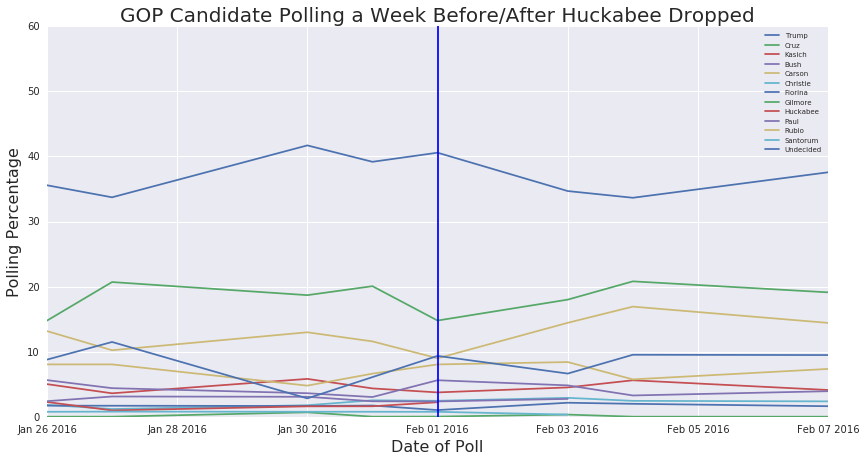

In [18]:
stats.PlotChart(candidates, HuckabeePolls, 'Huckabee')

Rubio gained 3.72 percentage points in polling, or 59.57% of all polling gains, going up from 11.39 to 15.11
after Huckabee suspended his campaign giving up 1.74 polling percentage and other candidates lost a cumulative 4.50.


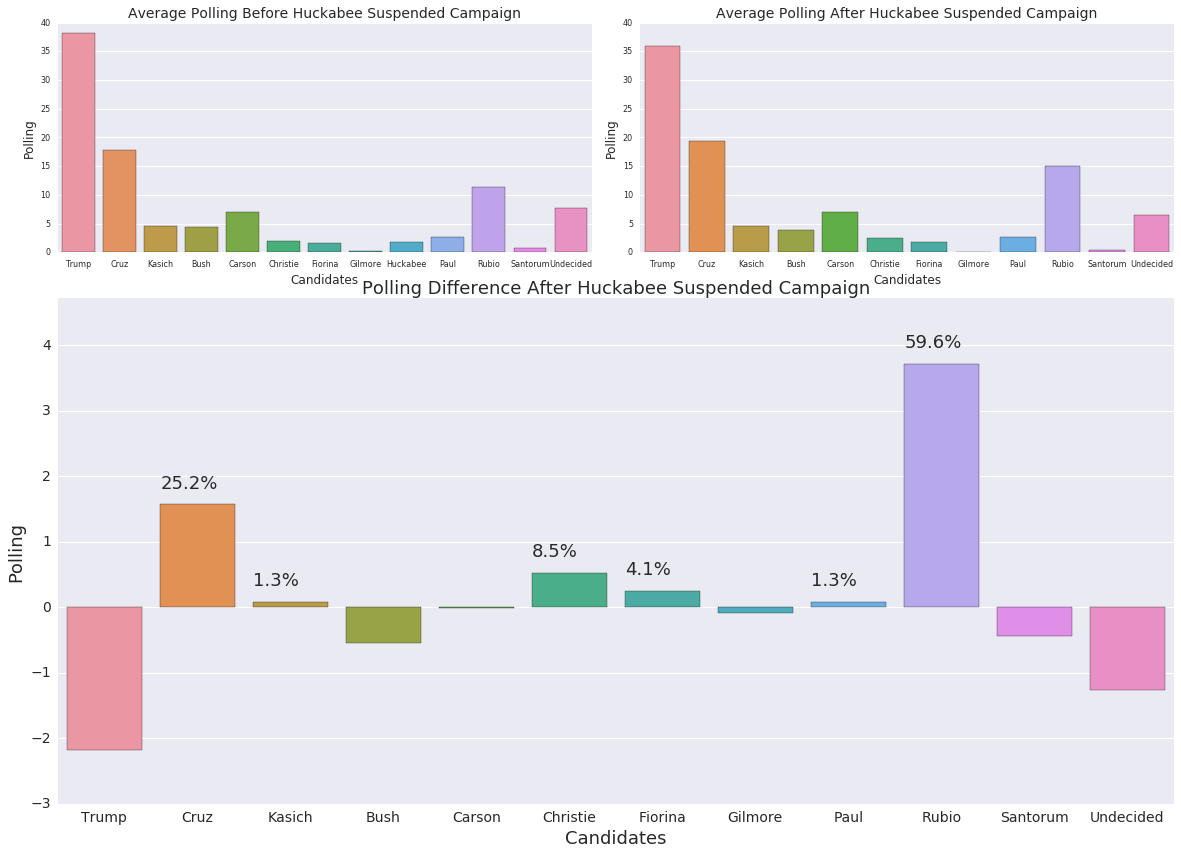

In [19]:
PlotPolling('Huckabee')

### Jeb Bush Suspends His Campaign

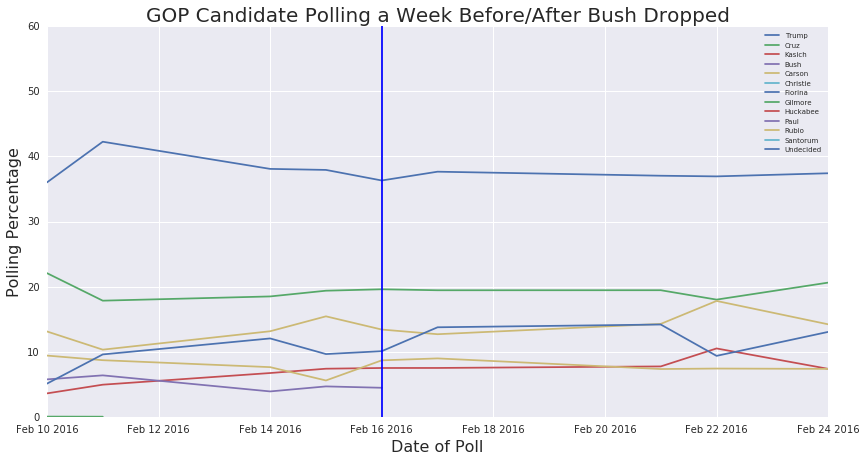

In [20]:
stats.PlotChart(candidates, BushPolls, 'Bush')

Kasich gained 2.38 percentage points in polling, or 30.33% of all polling gains, going up from 6.03 to 8.41
Rubio gained 2.14 percentage points in polling, or 32.97% of all polling gains, going up from 13.08 to 15.22
Undecided gained 1.97 percentage points in polling, or 36.59% of all polling gains, going up from 10.28 to 12.26
after Bush suspended his campaign giving up 5.03 polling percentage and other candidates lost a cumulative 1.47.


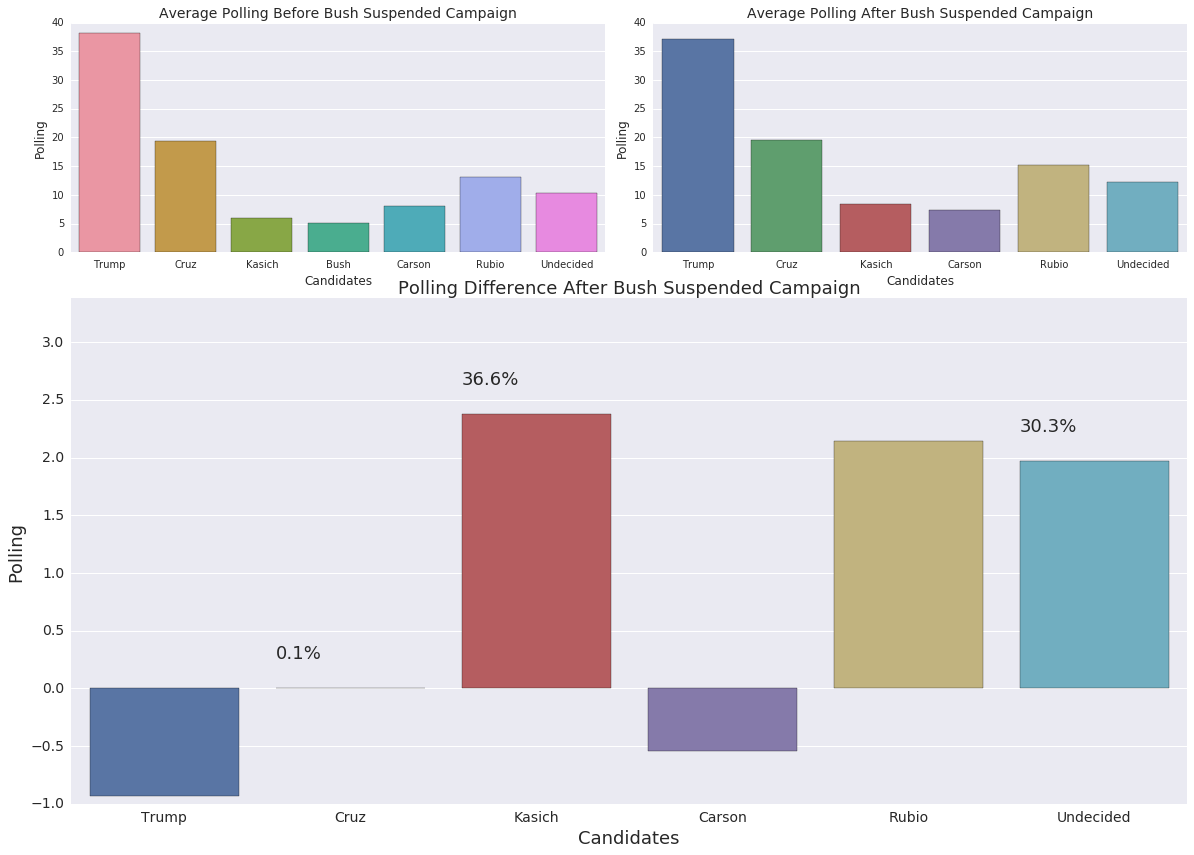

In [21]:
PlotPolling('Bush')

### Ben Carson Suspends His Campaign

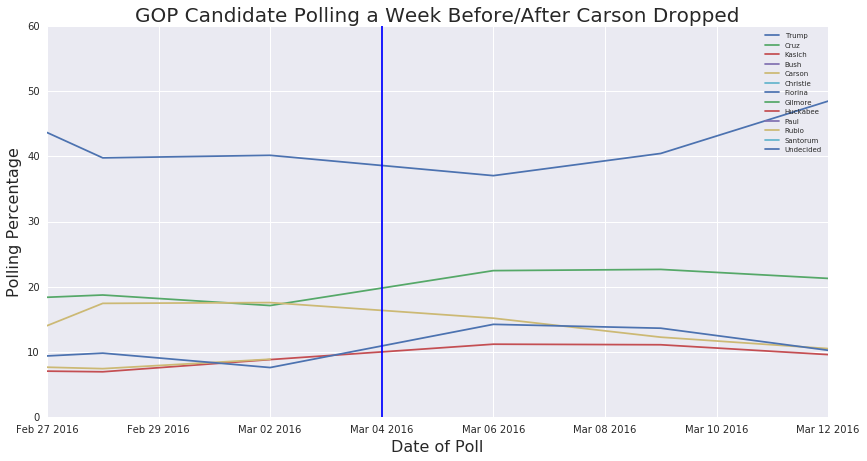

In [22]:
stats.PlotChart(candidates, CarsonPolls, 'Carson')

Cruz gained 3.83 percentage points in polling, or 30.39% of all polling gains, going up from 18.05 to 21.88
after Carson suspended his campaign giving up 7.95 polling percentage and other candidates lost a cumulative 4.63.


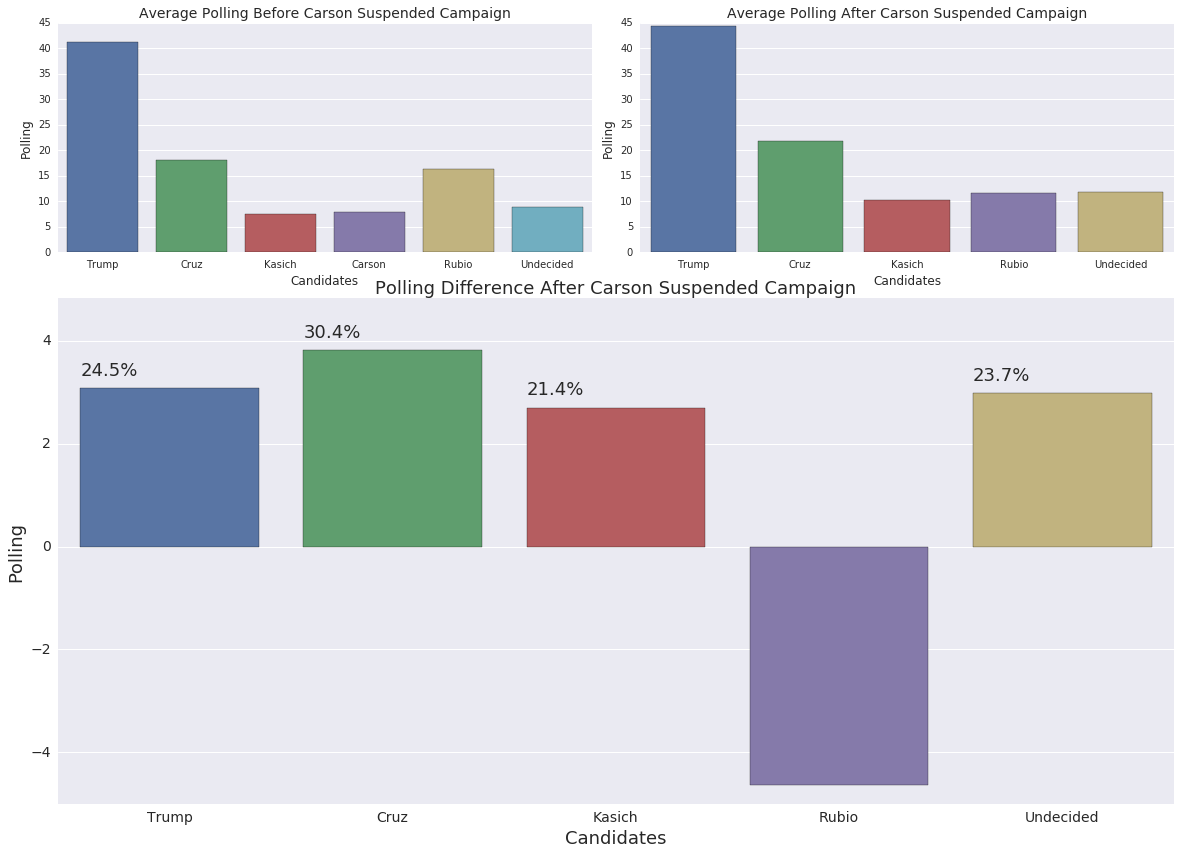

In [23]:
PlotPolling('Carson')